In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### 1. Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm (10 marks)

In [3]:
# Loading dataset
df = pd.read_csv('vehicle.csv')

In [4]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

Here we can see "class" column as dependent Variable and all other columns as "Independent" columns

In [5]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [6]:
df.shape

(846, 19)

In [7]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [8]:
df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [9]:
df.nunique()

compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              422
scaled_radius_of_gyration      143
scaled_radius_of_gyration.1     39
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
class                            3
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [11]:
#Checking for duplicates
df.duplicated().sum()

0

There are no duplicates in dataset

In [12]:
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

There are missing values in dataset. Later we will treat it

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar= False)

We can see missing values in heatmap also, white dashed lines shows presence of missing values

In [14]:
# medianFiller = lambda x : x.fillna(x.median())
# df = df.apply(medianFiller,axis=0)
#Treating missing values and filling it with median of that particular column
df1 = df.copy(deep=True)

df1['circularity']= df1['circularity'].fillna(df1['circularity'].median())
df1['distance_circularity']= df1['distance_circularity'].fillna(df1['distance_circularity'].median())
df1['radius_ratio']= df1['radius_ratio'].fillna(df1['radius_ratio'].median())
df1['pr.axis_aspect_ratio']= df1['pr.axis_aspect_ratio'].fillna(df1['pr.axis_aspect_ratio'].median())
df1['scatter_ratio']= df1['scatter_ratio'].fillna(df1['scatter_ratio'].median())
df1['elongatedness']= df1['elongatedness'].fillna(df1['elongatedness'].median())
df1['pr.axis_rectangularity']= df1['pr.axis_rectangularity'].fillna(df1['pr.axis_rectangularity'].median())
df1['scaled_variance']= df1['scaled_variance'].fillna(df1['scaled_variance'].median())
df1['scaled_variance.1']= df1['scaled_variance.1'].fillna(df1['scaled_variance.1'].median())
df1['scaled_radius_of_gyration']= df1['scaled_radius_of_gyration'].fillna(df1['scaled_radius_of_gyration'].median())
df1['scaled_radius_of_gyration.1']= df1['scaled_radius_of_gyration.1'].fillna(df1['scaled_radius_of_gyration.1'].median())
df1['hollows_ratio']= df1['hollows_ratio'].fillna(df1['hollows_ratio'].median())
df1['skewness_about']= df1['skewness_about'].fillna(df1['skewness_about'].median())
df1['skewness_about.1']= df1['skewness_about.1'].fillna(df1['skewness_about.1'].median())
df1['skewness_about.2']= df1['skewness_about.2'].fillna(df1['skewness_about.2'].median())


In [15]:
#Replacing value of class column
df1['class'] = df['class'].map({'van' : 1,'car': 2, 'bus' : 3})
df1['class'].value_counts()

2    429
3    218
1    199
Name: class, dtype: int64

In [16]:
#Again check if we have any values in dataset
df1.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

All are zero, it means there are no missing values now

In [17]:
# #Renaming Column values for clear understanding
df1 = df1.rename({"pr.axis_aspect_ratio" : "pr_axis_aspect_ratio",
                    "max.length_aspect_ratio" : "max_length_aspect_ratio",
                    "pr.axis_rectangularity" : "pr_axis_rectangularity", 
                    "max.length_rectangularity" :"max_length_rectangularity",
                   "scaled_variance.1" : "scaled_variance_1",
                    "scaled_radius_of_gyration.1" : "scaled_radius_of_gyration_1" ,
                    "skewness_about.1" : "skewness_about_1",
                    "skewness_about.2" : "skewness_about_2" }
                    , axis = 'columns'
                  )

##### 2.Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (10 points)

Univariate Analysis

In [18]:
#Compactness
plt.figure(figsize=(16,4))
plt.subplot(1,5,1)
plt.title('compactness')
sns.distplot(df1['compactness'], color = 'green')

#Circularity
plt.subplot(1,5,2)
plt.title('circularity')
sns.distplot(df1['circularity'] , color = 'grey')

#Distance_circularity
plt.subplot(1,5,3)
plt.title('distance_circularity')
sns.distplot(df1['distance_circularity'] , color = 'red')

#Radius_ratio
plt.subplot(1,5,4)
plt.title('radius_ratio')
sns.distplot(df1['radius_ratio'], color ='purple')

#Axis expect ratio
plt.subplot(1,5,5)
plt.title('pr_axis_aspect_ratio')
sns.distplot(df1['pr_axis_aspect_ratio'])

Here we can see above columns are following Normal distribution (bit squeezed) and also bi-modal distribution.

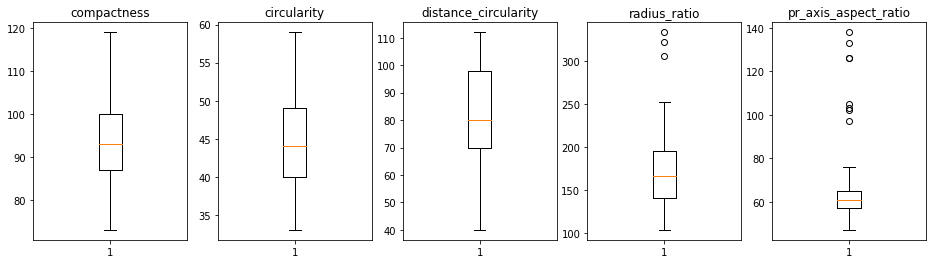

In [19]:
#Checking Outliers
#Compactness
plt.figure(figsize=(16,4))
plt.subplot(1,5,1)
plt.title('compactness')
plt.boxplot(df1['compactness']);

#Circularity
plt.subplot(1,5,2)
plt.title('circularity')
plt.boxplot(df1['circularity']);

#Distance_circularity
plt.subplot(1,5,3)
plt.title('distance_circularity')
plt.boxplot(df1['distance_circularity']);

#Radius_ratio
plt.subplot(1,5,4)
plt.title('radius_ratio')
radius_ratio = plt.boxplot(df1['radius_ratio']);

#Axis expect ratio
plt.subplot(1,5,5)
plt.title('pr_axis_aspect_ratio')
axis_aspect = plt.boxplot(df1['pr_axis_aspect_ratio']);

Presence of outliers in columns - radius_ratio and pr.axis_aspect_ratio

In [20]:
#Treating outliers
upper_fence_1 = radius_ratio['caps'][1].get_data()[1][1]
print(upper_fence_1)

print(f'Number of Outliers in radius_ratio column = {len(df1[df1.radius_ratio>upper_fence_1])}');
df1[df1.radius_ratio>upper_fence_1]
df1.loc[df1.radius_ratio>upper_fence_1,'radius_ratio'] = upper_fence_1
df1.fillna(upper_fence_1,inplace= True)
print(f'Number of Outliers in radius_ratio column = {len(df1[df1.radius_ratio>upper_fence_1])}');


252.0
Number of Outliers in radius_ratio column = 3
Number of Outliers in radius_ratio column = 0


In [21]:
#Treating outliers
upper_fence_2 = axis_aspect['caps'][1].get_data()[1][1]
print(upper_fence_2)

print(f'Number of Outliers in pr_axis_aspect_ratio column = {len(df1[df1.pr_axis_aspect_ratio>upper_fence_2])}');
df1[df1.pr_axis_aspect_ratio>upper_fence_2]

df1.loc[df1.pr_axis_aspect_ratio>upper_fence_2,'pr_axis_aspect_ratio'] = upper_fence_2
df1.fillna(upper_fence_2,inplace= True)
print(f'Number of Outliers in pr_axis_aspect_ratio column = {len(df1[df1.pr_axis_aspect_ratio>upper_fence_2])}');


76.0
Number of Outliers in pr_axis_aspect_ratio column = 8
Number of Outliers in pr_axis_aspect_ratio column = 0


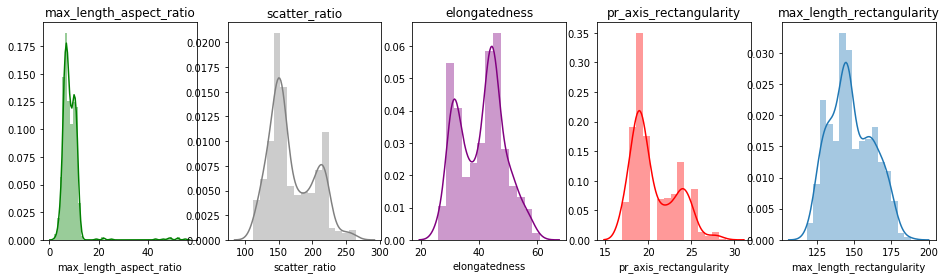

In [22]:
#Max length aspect Ratio
plt.figure(figsize=(16,4))
plt.subplot(1,5,1)
plt.title('max_length_aspect_ratio')
sns.distplot(df1['max_length_aspect_ratio'] , color = 'green')

#Scatter ratio
plt.subplot(1,5,2)
plt.title('scatter_ratio')
sns.distplot(df1['scatter_ratio'] , color = 'grey')

#Elongatedness
plt.subplot(1,5,3)
plt.title('elongatedness')
sns.distplot(df1['elongatedness'] , color = 'purple')

#Axis rectangularity
plt.subplot(1,5,4)
plt.title('pr_axis_rectangularity')
sns.distplot(df1['pr_axis_rectangularity'] , color = 'red')

#Max length rectangularity
plt.subplot(1,5,5)
plt.title('max_length_rectangularity')
sns.distplot(df1['max_length_rectangularity'])

Here we can see all columns following bi-modal distribution.

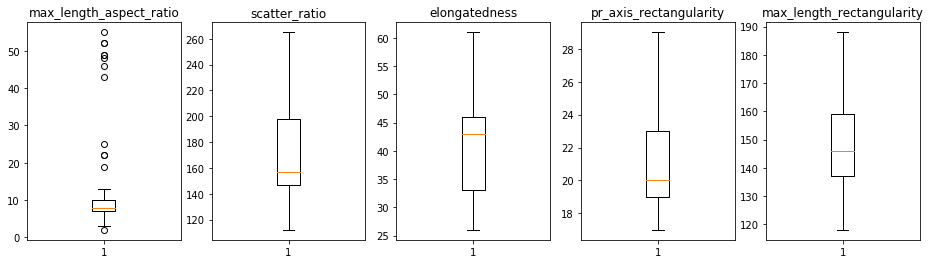

In [23]:
#Checking presence of outliers
#Max length aspect Ratio
plt.figure(figsize=(16,4))
plt.subplot(1,5,1)
plt.title('max_length_aspect_ratio')
max_len_aspect= plt.boxplot(df1['max_length_aspect_ratio']);

#Scatter ratio
plt.subplot(1,5,2)
plt.title('scatter_ratio')
plt.boxplot(df1['scatter_ratio']);

#Elongatedness
plt.subplot(1,5,3)
plt.title('elongatedness')
plt.boxplot(df1['elongatedness']);

#Axis rectangularity
plt.subplot(1,5,4)
plt.title('pr_axis_rectangularity')
plt.boxplot(df1['pr_axis_rectangularity']);

#Max length rectangularity
plt.subplot(1,5,5)
plt.title('max_length_rectangularity')
plt.boxplot(df1['max_length_rectangularity']);

Presence of outlier in column - max_length_aspect_ratio

In [24]:
#Treating outliers
upper_fence_3= max_len_aspect['caps'][1].get_data()[1][1]
print(upper_fence_3)

print(f'Number of Outliers in max_length_aspect_ratio column = {len(df1[df1.max_length_aspect_ratio>upper_fence_3])}');
df1[df1.max_length_aspect_ratio>upper_fence_3]

df1.loc[df1.max_length_aspect_ratio>upper_fence_3,'max_length_aspect_ratio'] = upper_fence_3
df1.fillna(upper_fence_3,inplace= True)
print(f'Number of Outliers in max_length_aspect_ratio column = {len(df1[df1.max_length_aspect_ratio>upper_fence_3])}');


13.0
Number of Outliers in max_length_aspect_ratio column = 12
Number of Outliers in max_length_aspect_ratio column = 0


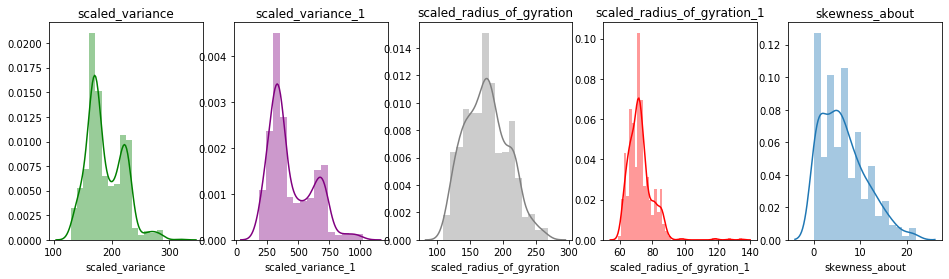

In [25]:
#Scaled variance
plt.figure(figsize=(16,4))
plt.subplot(1,5,1)
plt.title('scaled_variance')
sns.distplot(df1['scaled_variance'] , color = 'green')

#Scaled variance 1
plt.subplot(1,5,2)
plt.title('scaled_variance_1')
sns.distplot(df1['scaled_variance_1'] , color = 'purple')

#Scaled radius of gyration
plt.subplot(1,5,3)
plt.title('scaled_radius_of_gyration')
sns.distplot(df1['scaled_radius_of_gyration'] , color = 'grey')

#Scaled radius od gyration.1
plt.subplot(1,5,4)
plt.title('scaled_radius_of_gyration_1')
sns.distplot(df1['scaled_radius_of_gyration_1'] , color = 'red')

#Skewness about
plt.subplot(1,5,5)
plt.title('skewness_about')
sns.distplot(df1['skewness_about'])

Here we can see above columns are following bi-modal distribution and normal distribution.

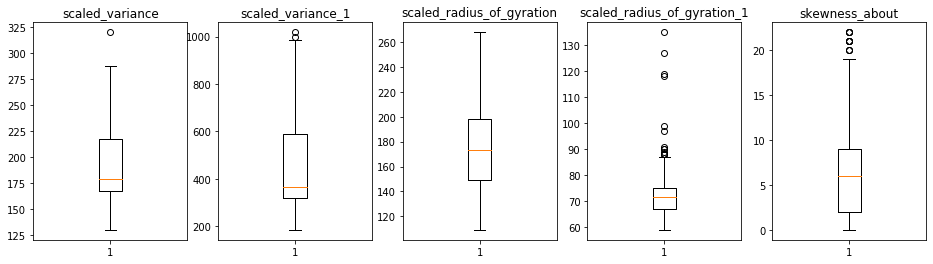

In [26]:
#Scaled variance
plt.figure(figsize=(16,4))
plt.subplot(1,5,1)
plt.title('scaled_variance')
scaled_var =plt.boxplot(df1['scaled_variance']);

#Scaled variance 1
plt.subplot(1,5,2)
plt.title('scaled_variance_1')
scaled_var1=plt.boxplot(df1['scaled_variance_1']);

#Scaled radius of gyration
plt.subplot(1,5,3)
plt.title('scaled_radius_of_gyration')
plt.boxplot(df1['scaled_radius_of_gyration']);

#Scaled radius od gyration.1
plt.subplot(1,5,4)
plt.title('scaled_radius_of_gyration_1')
scaled_gyration1=plt.boxplot(df1['scaled_radius_of_gyration_1']);

#Skewness about
plt.subplot(1,5,5)
plt.title('skewness_about')
skew_about= plt.boxplot(df1['skewness_about']);

Presence of outlier in columns - scaled_variance , scaled_varaince_1 , scaled_radius_of_gyration_1 and skewness_about

In [27]:
#Treating outliers
upper_fence_4= scaled_var['caps'][1].get_data()[1][1]
print(upper_fence_4)

print(f'Number of Outliers in scaled_variance column = {len(df1[df1.scaled_variance>upper_fence_4])}');
df1[df1.scaled_variance>upper_fence_4]

df1.loc[df1.scaled_variance>upper_fence_4,'scaled_variance'] = upper_fence_4
df1.fillna(upper_fence_4,inplace= True)
print(f'Number of Outliers in scaled_variance column = {len(df1[df1.scaled_variance>upper_fence_4])}');


288.0
Number of Outliers in scaled_variance column = 1
Number of Outliers in scaled_variance column = 0


In [28]:
#Treating outliers
upper_fence_5= scaled_var1['caps'][1].get_data()[1][1]
print(upper_fence_5)

print(f'Number of Outliers in scaled_variance_1 column = {len(df1[df1.scaled_variance_1>upper_fence_5])}');
df1[df1.scaled_variance_1>upper_fence_5]

df1.loc[df1.scaled_variance_1>upper_fence_5,'scaled_variance_1'] = upper_fence_5
df1.fillna(upper_fence_5,inplace= True)
print(f'Number of Outliers in scaled_variance_1 column = {len(df1[df1.scaled_variance_1>upper_fence_5])}');


987.0
Number of Outliers in scaled_variance_1 column = 2
Number of Outliers in scaled_variance_1 column = 0


In [29]:
#Treating outliers
upper_fence_6= scaled_gyration1['caps'][1].get_data()[1][1]
print(upper_fence_6)

print(f'Number of Outliers in scaled_radius_of_gyration_1 column = {len(df1[df1.scaled_radius_of_gyration_1>upper_fence_6])}');
df1[df1.scaled_radius_of_gyration_1>upper_fence_6]

df1.loc[df1.scaled_radius_of_gyration_1>upper_fence_6,'scaled_radius_of_gyration_1'] = upper_fence_6
df1.fillna(upper_fence_6,inplace= True)
print(f'Number of Outliers in scaled_radius_of_gyration_1 column = {len(df1[df1.scaled_radius_of_gyration_1>upper_fence_6])}');


87.0
Number of Outliers in scaled_radius_of_gyration_1 column = 15
Number of Outliers in scaled_radius_of_gyration_1 column = 0


In [30]:
#Treating outliers
upper_fence_7= skew_about['caps'][1].get_data()[1][1]
print(upper_fence_7)

print(f'Number of Outliers in skewness_about column = {len(df1[df1.skewness_about>upper_fence_7])}');
df1[df1.skewness_about>upper_fence_7]

df1.loc[df1.skewness_about>upper_fence_7,'skewness_about'] = upper_fence_7
df1.fillna(upper_fence_7,inplace= True)
print(f'Number of Outliers in skewness_about column = {len(df1[df1.skewness_about>upper_fence_7])}');


19.0
Number of Outliers in skewness_about column = 12
Number of Outliers in skewness_about column = 0


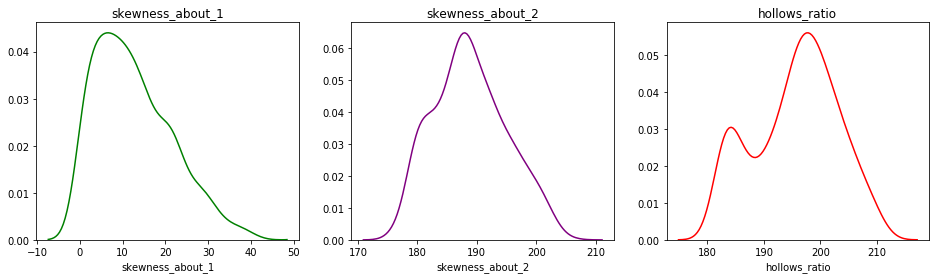

In [31]:
#Skewness about.1
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.title('skewness_about_1')
sns.distplot(df1['skewness_about_1'], hist = False, color = 'green')

#Skewness about.2
plt.subplot(1,3,2)
plt.title('skewness_about_2')
sns.distplot(df1['skewness_about_2'] ,hist = False, color = 'purple')

#Hollows Ratio
plt.subplot(1,3,3)
plt.title('hollows_ratio')
sns.distplot(df1['hollows_ratio'], hist = False, color = 'red')

Again, above columns are following normal and bi-modal distribution.

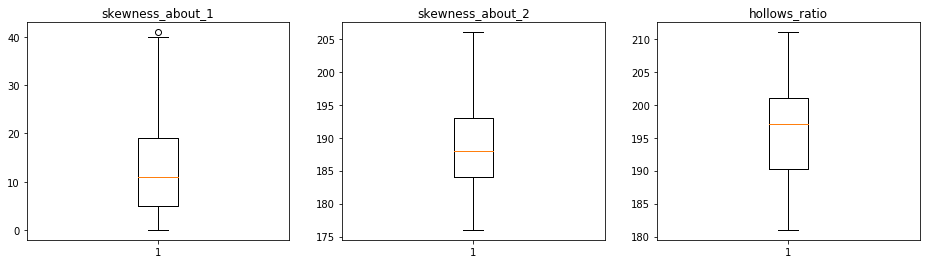

In [32]:
#Skewness about.1
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.title('skewness_about_1')
skew_about1 = plt.boxplot(df1['skewness_about_1']);

#Skewness about.2
plt.subplot(1,3,2)
plt.title('skewness_about_2')
plt.boxplot(df1['skewness_about_2']);

#Hollows Ratio
plt.subplot(1,3,3)
plt.title('hollows_ratio')
plt.boxplot(df1['hollows_ratio']);

Presence of outlier in column - Skewness_about.1

In [33]:
#Treating outliers
upper_fence_8= skew_about1['caps'][1].get_data()[1][1]
print(upper_fence_8)

print(f'Number of Outliers in skewness_about_1 column = {len(df1[df1.skewness_about_1>upper_fence_8])}');
df1[df1.skewness_about_1>upper_fence_8]

df1.loc[df1.skewness_about_1>upper_fence_8,'skewness_about_1'] = upper_fence_8
df1.fillna(upper_fence_8,inplace= True)
print(f'Number of Outliers in skewness_about_1 column = {len(df1[df1.skewness_about_1>upper_fence_8])}');


40.0
Number of Outliers in skewness_about_1 column = 1
Number of Outliers in skewness_about_1 column = 0


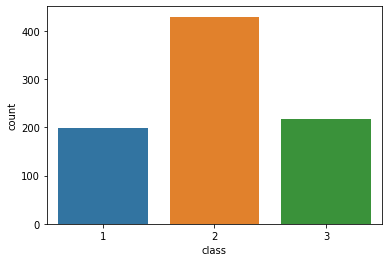

In [34]:
sns.countplot(df1['class'])

In [35]:
df1['class'].value_counts()

2    429
3    218
1    199
Name: class, dtype: int64

We can see,dependent columns "class", highest vehicle type were of class-2 i.e car type. 

Multivaraiate Analysis

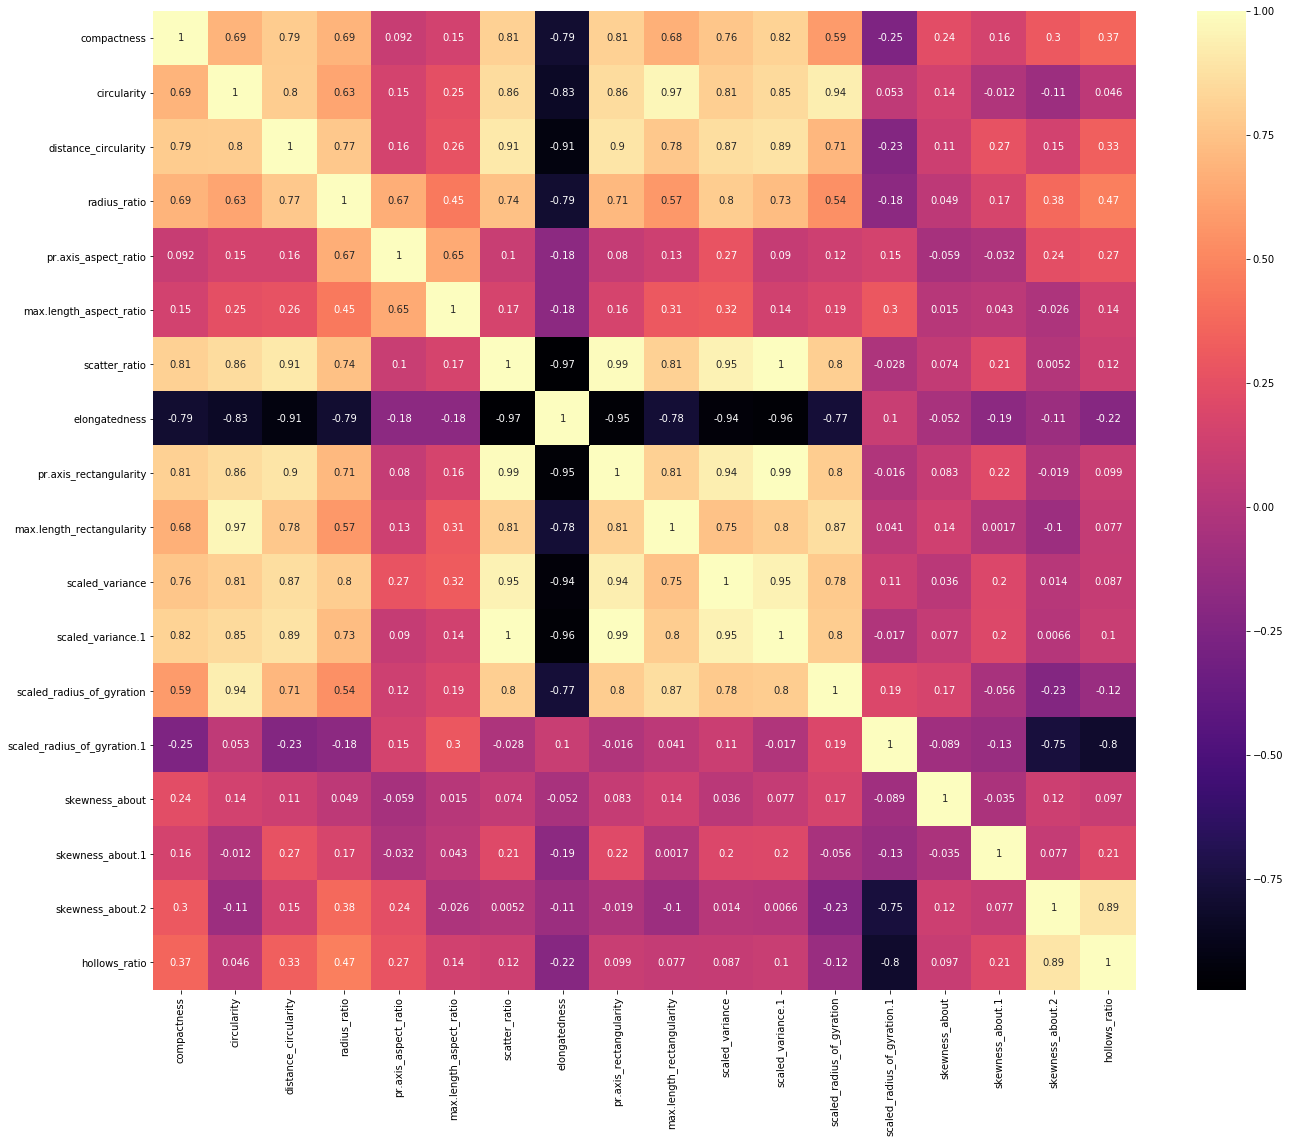

In [36]:
# corr = df1.corr()
# corr.style.background_gradient(cmap='YlGnBu')

cor = df.corr()
plt.figure(figsize=(22, 18))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True, cmap = 'magma')


In the above heatmap, we can see there are many columns which are highly correlated.

In [571]:
sns.pairplot(df1,diag_kind='kde', hue = 'class')

In above pairplot, we can see how correlated three types of classes : van, car and bus are.

##### 3. . Split the data into train and test (Suggestion: specify “random state” if you are using train_test_split from Sklearn) (5 marks)

In [37]:
from sklearn.model_selection import train_test_split

#Independent variables or Predictor Features  
X = df1.drop(['class'],axis =1)
#Dependent variable or Predicted class
y = df1['class']


#Split data in training and test set in the ratio of 70:30, random_state=5)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=.30,random_state=5)
print(X_train1.shape, X_test1.shape)

(592, 18) (254, 18)


Here, training and test data is splitted in the ratio of 70:30.

##### 4. Train a Support vector machine using the train set and get the accuracy on the test set (10 marks)

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix

svc_model = SVC()
# svc_model = SVC(C=.1, kernel= 'linear',gamma=1)
svc_model.fit(X_train1,y_train1)
print('Accuracy on Test (without standardized data) is :', svc_model.score(X_test1,y_test1))

Accuracy on Test (without standardized data) is : 0.6259842519685039


In above SVM model, it is giving 94% accuracy on test data. Please note data is not scaled currently and also none of correlated columns are dropped.

##### 5. Perform K-fold cross validation and get the cross validation score of the model (optional)


In [41]:
#Kfold for SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
seed = 5

kfold = KFold(n_splits=num_folds,random_state=seed)
model = SVC()
# model = SVC(C=.1, kernel= 'linear',gamma=1)
results = cross_val_score(model,X,y,cv=kfold)
print('Different folds :',results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

C:\PYTHON\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Different folds : [0.63529412 0.68235294 0.58823529 0.61176471 0.58823529 0.76470588
 0.71428571 0.63095238 0.70238095 0.66666667]
Accuracy: 65.849% (5.505%)


In above Kfold model,dataset is divided into 10 folds and giving accuracy of 66% on test data.

##### 6. Use PCA from Scikit learn, extract Principal Components that capture about 95% of the variance in the data – (10 points)


In [45]:
#Standardizing the data
from scipy.stats import zscore
XXtrain_std = X_train1.apply(zscore)
XXtest_std = X_test1.apply(zscore)

In [46]:
#create covariance matrix
cov_mat_train = np.cov(XXtrain_std.T)

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18,random_state=5)
pca.fit_transform(XXtrain_std)
pca.transform(XXtest_std)

array([[-2.67215339,  3.37822209, -0.2224237 , ..., -0.07837114,
        -0.0500016 ,  0.04247892],
       [-2.52191412,  3.00010761, -0.66790493, ..., -0.16880687,
        -0.00859797,  0.03069531],
       [ 1.99333187, -1.6352023 ,  0.26517284, ..., -0.04028292,
         0.07987869,  0.02246376],
       ...,
       [-4.03907578,  2.2412922 ,  0.41034395, ...,  0.00544139,
        -0.13925712, -0.04474252],
       [-0.84506439, -1.54146384, -0.32435942, ..., -0.05272231,
         0.0826659 ,  0.03959868],
       [ 2.93946323, -0.58071115, -0.05692004, ...,  0.08985925,
         0.14433075,  0.02569474]])

Since we have 18 columns in dataset, so giving number of component as 18. Later we will reduce it.

In [48]:
#Eigen Values
print(pca.explained_variance_)

[9.62030927e+00 3.33470498e+00 1.22180309e+00 1.15694311e+00
 9.08332110e-01 7.44426756e-01 3.44805036e-01 2.29635923e-01
 1.31150286e-01 8.88185403e-02 6.41747631e-02 5.64174885e-02
 4.28928757e-02 3.08639760e-02 2.07366513e-02 1.86913641e-02
 1.17535792e-02 3.99706373e-03]


In [49]:
#Eigen vectors
print(pca.components_)

[[ 2.71353898e-01  2.90947821e-01  3.02163841e-01  2.65232879e-01
   8.36720066e-02  1.79158182e-01  3.13024794e-01 -3.11180694e-01
   3.09932270e-01  2.80819183e-01  3.04179831e-01  3.08901526e-01
   2.68039112e-01 -3.43977527e-02  3.20074522e-02  4.95190365e-02
   3.06980530e-02  7.64084692e-02]
 [-9.74016445e-02  1.24603840e-01 -5.15733371e-02 -2.03388690e-01
  -2.50820342e-01 -1.16000235e-01  6.86439690e-02 -4.44910308e-05
   7.99173214e-02  1.13940465e-01  7.28561280e-02  7.72173216e-02
   2.01812582e-01  5.00644362e-01 -3.56650619e-02 -7.49070164e-02
  -5.06804209e-01 -5.13940407e-01]
 [ 6.45509443e-02 -1.77885840e-01  1.22791390e-01 -1.32488390e-01
  -4.42111979e-01 -3.76030828e-02  1.05817647e-01 -5.02566239e-02
   1.14692004e-01 -1.54419472e-01  7.47890928e-02  1.06629902e-01
  -2.07467576e-01 -5.30807343e-02 -1.93117101e-01  7.62756426e-01
  -3.09598797e-02  3.29451244e-02]
 [ 1.66703715e-01  7.30929615e-02  5.71351689e-02 -2.65491144e-01
  -4.95984972e-01  2.11382249e-01 -3.

In [50]:
print(pca.explained_variance_ratio_)

[5.33558819e-01 1.84948446e-01 6.77632907e-02 6.41660450e-02
 5.03776536e-02 4.12871821e-02 1.91234775e-02 1.27360014e-02
 7.27381934e-03 4.92602828e-03 3.55924221e-03 3.12901048e-03
 2.37891230e-03 1.71176894e-03 1.15009017e-03 1.03665505e-03
 6.51873622e-04 2.21683996e-04]


In [51]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

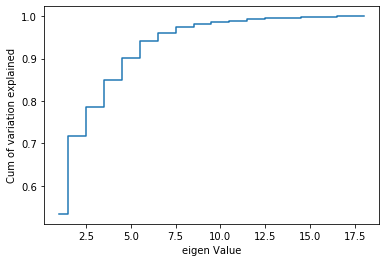

In [52]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

By looking at above barplot and stepplot, at Eigen_value=6 we can explain over 95% of the variation i.e
6 dimensions seems very reasonable

In [55]:
pca6 = PCA(n_components=6)
Xpca6_train = pca6.fit_transform(XXtrain_std)
Xpca6_test = pca6.transform(XXtest_std)
Xpca6_train.transpose()
print(pca6.explained_variance_ratio_)


[0.53355882 0.18494845 0.06776329 0.06416604 0.05037765 0.04128718]


In [56]:
print('Components:\n',pca6.components_)

Components:
 [[ 2.71353898e-01  2.90947821e-01  3.02163841e-01  2.65232879e-01
   8.36720066e-02  1.79158182e-01  3.13024794e-01 -3.11180694e-01
   3.09932270e-01  2.80819183e-01  3.04179831e-01  3.08901526e-01
   2.68039112e-01 -3.43977527e-02  3.20074522e-02  4.95190365e-02
   3.06980530e-02  7.64084692e-02]
 [-9.74016445e-02  1.24603840e-01 -5.15733371e-02 -2.03388690e-01
  -2.50820342e-01 -1.16000235e-01  6.86439690e-02 -4.44910308e-05
   7.99173214e-02  1.13940465e-01  7.28561280e-02  7.72173216e-02
   2.01812582e-01  5.00644362e-01 -3.56650619e-02 -7.49070164e-02
  -5.06804209e-01 -5.13940407e-01]
 [ 6.45509443e-02 -1.77885840e-01  1.22791390e-01 -1.32488390e-01
  -4.42111979e-01 -3.76030828e-02  1.05817647e-01 -5.02566239e-02
   1.14692004e-01 -1.54419472e-01  7.47890929e-02  1.06629902e-01
  -2.07467576e-01 -5.30807343e-02 -1.93117101e-01  7.62756426e-01
  -3.09598797e-02  3.29451244e-02]
 [ 1.66703715e-01  7.30929615e-02  5.71351689e-02 -2.65491144e-01
  -4.95984972e-01  2.113

In [57]:
Xpca6_train

array([[-0.21456713, -1.40233912, -0.86277727,  0.31970713,  1.49387655,
         0.59077973],
       [ 2.09146176, -1.05025432, -1.45685856, -0.65549102,  1.11367335,
         0.60024556],
       [-5.56365603,  2.03619675, -0.52144543,  1.13541332,  1.16142228,
         0.49758479],
       ...,
       [-2.020853  ,  2.66050569,  0.20511005,  0.72899813, -0.33507509,
         0.8420143 ],
       [ 3.77781674, -0.05040981,  0.42950203,  0.00705238,  0.04571498,
        -0.0826676 ],
       [-0.13843716, -0.81064792, -0.42642419, -0.74519611, -0.48980267,
        -0.49600316]])

In [58]:
Xpca6_test

array([[-2.67215339,  3.37822209, -0.2224237 ,  0.15016896,  0.14557654,
        -0.68834931],
       [-2.52191412,  3.00010761, -0.66790493,  0.21479999, -0.38052775,
        -0.09429807],
       [ 1.99333187, -1.6352023 ,  0.26517284,  0.08029414,  0.07319639,
        -1.08349956],
       ...,
       [-4.03907578,  2.2412922 ,  0.41034395, -0.15795476, -0.20024376,
        -1.22133835],
       [-0.84506439, -1.54146384, -0.32435942, -1.84446569,  1.47913438,
        -0.79935947],
       [ 2.93946323, -0.58071115, -0.05692004, -0.40159502, -1.01159964,
        -1.22191805]])

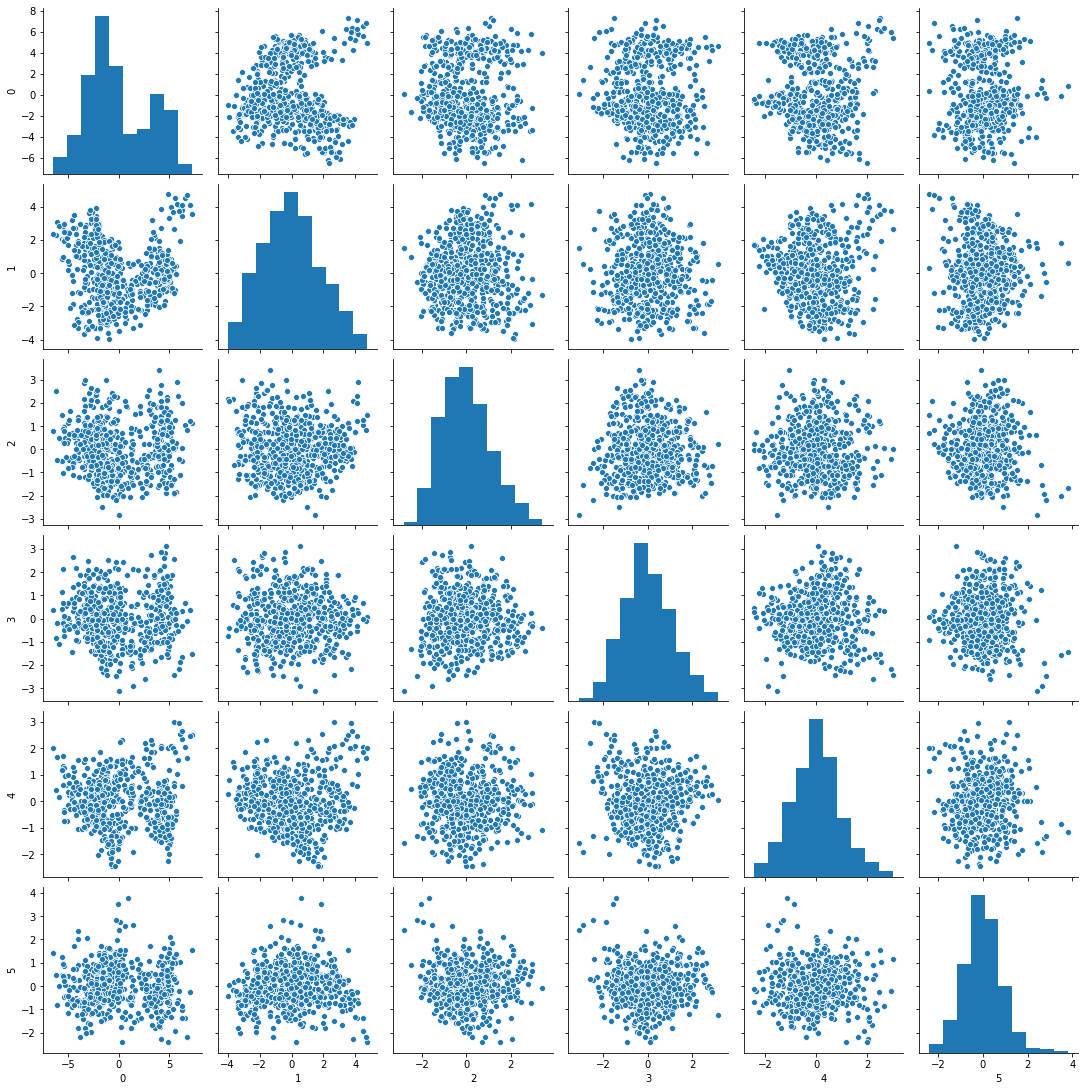

In [59]:
sns.pairplot(pd.DataFrame(Xpca6_train))

We can see lot of information by plotting pairplot of 6 dimensions.

##### 7. . Repeat steps 3,4 and 5 but this time, use Principal Components instead of the original data. And the accuracy score should be on the same rows of test data that were used earlier. (hint: set the same random state) (20 marks)


In [62]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

#Test Support Vector Machine using PCA now
svc_pca = SVC()
svc_pca.fit(Xpca6_train,y_train1)
print('After PCA, SVC test score :',svc_pca.score(Xpca6_test,y_test1))

#Step:5
#Test Kfold using PCA now
num_folds = 10
seed = 5
kfold = KFold(n_splits=num_folds,random_state=seed)
model_pca = SVC()
results_pca = cross_val_score(model_pca,Xpca6_test,y_test1,cv=kfold)
print("After PCA, Kfold test score: %.3f%% (%.3f%%)" % (results_pca.mean()*100.0, results_pca.std()*100.0))

After PCA, SVC test score : 0.889763779527559
After PCA, Kfold test score: 85.108% (8.711%)


C:\PYTHON\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


So after PCA, for SVC model, accruracy on test is 85% and for kfold accuracy is 80% which is very good, because we are getting this accuracy on 6 dimention data. 

##### 8. . Compare the accuracy scores and cross validation scores of Support vector machines – one trained using raw data and the other using Principal Components, and mention your findings (5 points)


In [63]:
print('SVC Accuracy score (Raw data)         :',svc_model.score(X_test1,y_test1))
print('SVC cross validation score (Raw data) :', results.mean()*100.0)
print('SVC Accuracy score (PCA)              :',  svc_pca.score(Xpca6_test,y_test1))
print('SVC cross validation score (PCA)      :',results_pca.mean()*100.0)

SVC Accuracy score (Raw data)         : 0.6259842519685039
SVC cross validation score (Raw data) : 65.84873949579833
SVC Accuracy score (PCA)              : 0.889763779527559
SVC cross validation score (PCA)      : 85.1076923076923


In the given dataset we have trained SVM model on both original and dimensionally reduced dataset.
After reducing dimensions from 18 to 6, test accuracy of SVM model and cross validation on SVM is very good i.e 85% and 80% respectively. We can clearly see how PCA can help us in achieving great accuracy on reduced dimensions.
If we have to choose between these two then we can go for SVM model which is giving 85% accuracy on test data.